#1. 교차검증이란?
> 데이터를 훈련데이터와 검증데이터로 분리하여 모델을 검증하는 방법이다.

> 기존에 훈련데이터와 테스트데이터로 구분하여 학습하다 보면 고정된 테스트 데이터에서만 잘 동작되는 모델이 될 수 있다. 이를 과적합 이라고 하는데, 이러한 문제를 확인하기 위해 교차 검증을 사용한다.

##1.1 장점
> 
- 모든 데이터를 훈련에 활용할 수 있어 정확도가 향상되고, 부족한 데이터로 인해 발생되는 underfitting을 방지할 수 있다.
- 모든 데이터 셋을 평가에 활용할 수 있음으로, 평가에 사용되는 데이터 편중을 막을 수 있고, 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.


##1.2 단점
> 반복 횟수가 많기 때문에 모델 훈련 및 평가 시간이 오래 걸린다.

#2. 교차 검증 기법

## 2.1 K-겹 교차 검증 (K-Fold Cross Validation)


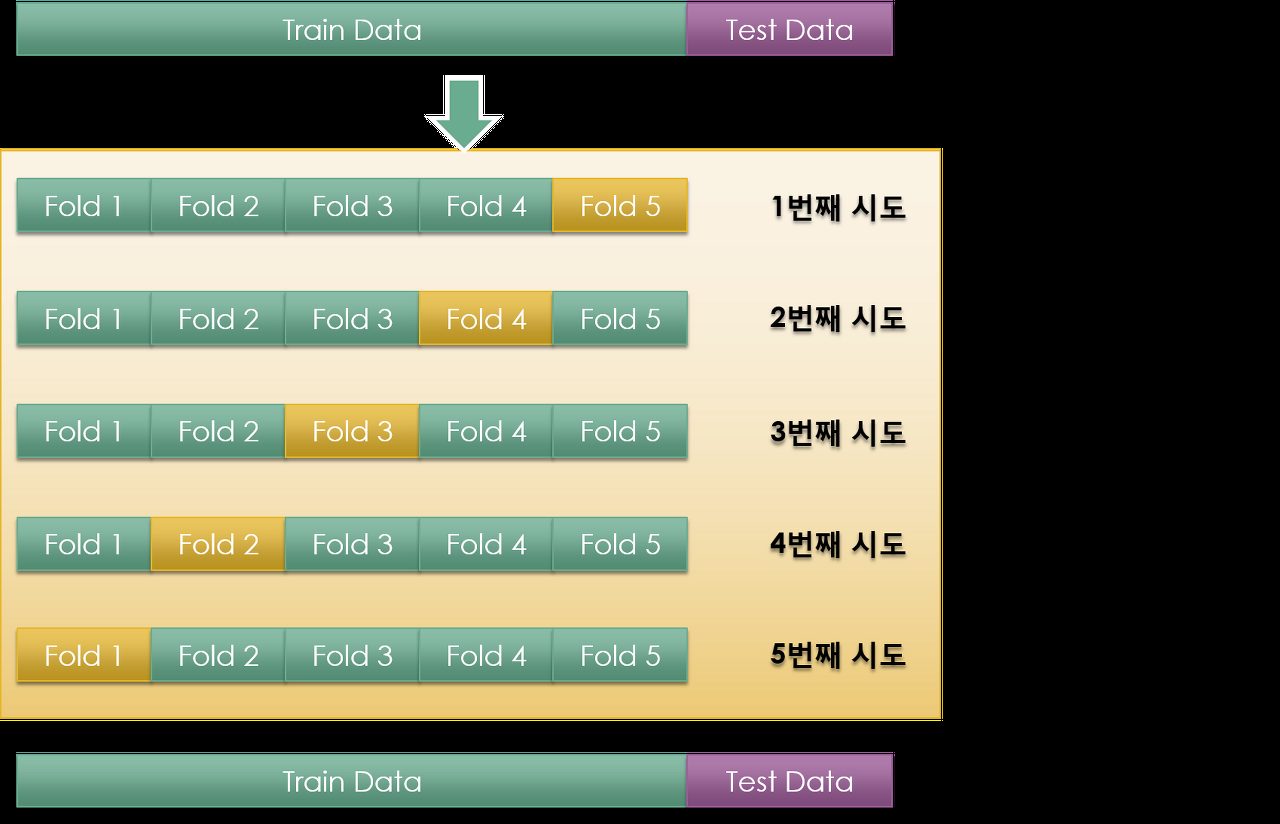

> 훈련데이터를 훈련데이터와 검증데이터로 분리하고 교차로 학습을 진행하여 모델의 성능을 향상시킨다.

#3. 데이터 읽기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [9]:
#DataFrame으로 만드는 방법
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
# 그냥 데이터와 라벨로만 나누는 방법
iris_data = iris.data
iris_label = iris.target

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

#4. 교차검증

In [12]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

> n_splits에 5를 입력함으로써 5개로 fold를 나누어 검증 한다.

In [19]:
cv_accuracy = []

> 교차검증을 진행할 때, 나오는 결과를 저장하기 위해 cv_accuracy라는 리스트를 생성한다.

In [16]:
for train_idx, test_idx in kfold.split(iris_data):
  print('train_idx : ', train_idx)
  print('test_idx : ', test_idx)
  print('===============================================================================')

train_idx :  [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
test_idx :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
train_idx :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123

> kfold.split을 통해 훈련용 데이터와 검증용 데이터로 나뉘게 된다. 나누는 기준은 위에서 kFold 클래스를 선언할 경우 적용한 n_splits의 수치만큼 나누게 된다.

> 실행 결과 위의 그림에서와 같이, '모든 데이터'를 훈련용과 검증용으로 사용하는 것을 볼 수 있다.

In [ ]:
for train_idx, test_idx in kfold.split(iris_data):
  x_train = iris_data[train_idx]
  y_train = iris_label[train_idx]

  #dt_clf.fit(x_train, y_train)

  x_test = iris_data[test_idx]
  y_test = iris_label[test_idx]

  print('x_train : ', x_train[:3])
  print('y_train : ', y_train[:3])
  print('x_test : ', x_test[:3])
  print('y_test : ', y_test[:3])

> train_idx, test_idx는 위치 정보임으로 실 데이터를 얻기 위해 iris_data와 iris_label의 데이터를 얻어왔다. 이 정보를 이용하여 추후 모델을 만들고 학습시킬 것이다.

In [21]:
from sklearn.metrics import accuracy_score
import numpy as np
for train_idx, test_idx in kfold.split(iris_data):
  #훈련데이터 
  x_train = iris_data[train_idx]
  y_train = iris_label[train_idx]

  #검증용 데이터
  x_test = iris_data[test_idx]
  y_test = iris_label[test_idx]

  #학습 및 예측
  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)

  #정확도 계산
  accuracy = round(accuracy_score(y_test, pred), 4)
  cv_accuracy.append(accuracy)
  print('교차검증 정확도 : ', accuracy)

print('\n\n평균 검증 정확도 : ', np.mean(cv_accuracy), 4)

교차검증 정확도 :  1.0
교차검증 정확도 :  1.0
교차검증 정확도 :  0.9
교차검증 정확도 :  0.9333
교차검증 정확도 :  0.8


평균 검증 정확도 :  0.9366600000000002 4


> 첫 번째와 두 번째 교차 검증 시 100%예측이 나왔으며 이는 테스트용 데이터에 맞춰진 과적합된 결과로 볼 수 있다.

> 세 번째 데이터에서는 예측률이 떨어 졌으며, 마지막 데이터에서는 더 덜어진 결과가 나왔다. 하지만 하나의 데이터로 여러 번 교차해서 학습시킴으로써, 예측 정확도를 더 올릴 수 있는 결과를 얻게 된다.

In [53]:
from sklearn.model_selection import train_test_split

x_test2, x_train2, y_test2, y_train2 = train_test_split(iris_df.iloc[0:, :4], iris_df['label'], train_size=0.2, random_state=7)
#help(train_test_split)
test = DecisionTreeClassifier()
test.fit(x_train2, y_train2)

pred2 = test.predict(x_test2)

print(accuracy_score(y_test2, pred2))

0.9666666666666667


In [47]:
print(len(y_train2), len(y_test2))
len(x_test2)

120 30


30

#5. Stratified K Fold
> 불균형한 분포도를 가진 레이블 데이터 집할을 위한 방식이다. 

> 대출 사기 데이터를 예측할 경우 1억개의 데이터중 1000개의 사기 데이터이다. 이런경우 정상적인 데이터와 대출사기 데이터가 적절히 분포될 확률이 적음으로 기존의 K-fold 교차 검증으로는 모델의 성능을 향상시키기 어렵다.

In [55]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['label'] = iris.target
df_iris[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df_iris['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

> 현재 label의 value에 대한 갯수는 50개씩 균등하게 나누어져 있다.  만약 훈련데이터가 0, 1이고 테스트 데이터가 2이면 정확도는 0으로 나타나게 될 것이다.

In [58]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)

cnt=1

for train_idx, test_idx in kfold.split(df_iris):
  label_train = df_iris['label'].iloc[train_idx]
  label_test = df_iris['label'].iloc[test_idx]

  print('교차검증 : ', cnt)
  print('학습 레이블 데이터 분포 : ')
  print(label_train.value_counts())
  print('검증 레이블 데이터 분포 : ')
  print(label_test.value_counts())
  cnt += 1

교차검증 :  1
학습 레이블 데이터 분포 : 
2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
0    50
Name: label, dtype: int64
교차검증 :  2
학습 레이블 데이터 분포 : 
2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    50
Name: label, dtype: int64
교차검증 :  3
학습 레이블 데이터 분포 : 
1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    50
Name: label, dtype: int64


> 학습 데이터와 검증 데이터가 중복되지 않아 예측 정확도는 0이 될 수 밖에 없다.

In [60]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

cnt=1

for train_idx, test_idx in skfold.split(df_iris, df_iris['label']):
  label_train = df_iris['label'].iloc[train_idx]
  label_test = df_iris['label'].iloc[test_idx]

  print('교차검증 : ', cnt)
  print('학습 레이블 데이터 분포 : ')
  print(label_train.value_counts())
  print('검증 레이블 데이터 분포 : ')
  print(label_test.value_counts())
  cnt += 1

교차검증 :  1
학습 레이블 데이터 분포 : 
2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    17
0    17
2    16
Name: label, dtype: int64
교차검증 :  2
학습 레이블 데이터 분포 : 
1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    17
0    17
1    16
Name: label, dtype: int64
교차검증 :  3
학습 레이블 데이터 분포 : 
0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    17
1    17
0    16
Name: label, dtype: int64


##5.1 Quiz
> 이전 KFold로 진행했던 교차 검증을 stratifiedKFold를 이용하여 모델을 만들어 보시오


In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
skfold = StratifiedKFold(n_splits=3)
accuracy_arr = []
dt_clf = DecisionTreeClassifier()

for train_idx, test_idx in skfold.split(df_iris.drop(['label'], axis=1), df_iris['label']):
  x_train = df_iris.iloc[train_idx, :4]
  y_train = df_iris['label'].iloc[train_idx]

  x_test = df_iris.iloc[test_idx, :4]
  y_test = df_iris['label'].iloc[test_idx]

  dt_clf.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(df_iris.drop(['label'], axis=1), df_iris['label'], test_size=0.2, random_state=62)

pred = dt_clf.predict(x_test)
accuracy = round(accuracy_score(y_test, pred), 4)
accuracy

1.0

In [69]:
for train_idx, test_idx in skfold.split(df_iris.drop(['label'], axis=1), df_iris['label']):
  x_train = df_iris.iloc[train_idx, :4]

  print(x_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
17                 5.1               3.5                1.4               0.3
18                 5.7               3.8                1.7               0.3
19                 5.1               3.8                1.5               0.3
20                 5.4               3.4                1.7               0.2
21                 5.1               3.7                1.5               0.4
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[100 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

#6. cross_val_score()
>sklearn에서 지원해주는 교차검증 API이다.
- cross_val_score(estimator, X, y=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
 - estimator : 분류 알고리즘(Classifier) 또는 회귀 알고리즘(Regressor)
 - X : feature dataset
 - y : label dataset
 - scoring : 예측 성능 평가 지표
 - cv : 교차 검증 폴드 수

> 분류 알고리즘이 입력되면 Stratified K Fold를 회귀 알고리즘이 입력되면 K Fold로 분할한다

In [73]:
from sklearn.datasets import load_iris
iris = load_iris()

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X=iris.data, y=iris.target, scoring='accuracy', cv=3)

> 현재 사용되는 알고리즘은 DecisionTreeClassifier로 분류 알고리즘이기 떄문에 Stratified K Fold로 교차검증을 하게 된다. scoring='accuracy'를 이용하여 정확도에 따른 검증을 하게 되며 cv=3으로 3개의 교차 검증을 진행하게 된다.

In [75]:
import numpy as np

print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.92 0.98]
평균 검증 정확도 :  0.96


#7. GridSearchCV
>GridSearchCV를 이용하여 모델에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출

>GridSearch의 주요 파라미터

- estimator : 적용 알고리즘 모델로 classifier, regressor, pipeline 등이 사용
- param_grid : key+리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지어준다.
- scoring : 예측 성능을 평가할 평가 방법을 지정, 문자열로 사이킷런의 성능평가 지표를 입력하나 별도의 함수 지정도 가능
- refit : 기본값은 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파리미터로 재학습시킴

In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.2, random_state=62)

> iris 정보를 읽어 들여 훈련, 테스트 데이터 획득

In [78]:
grid_params = {
    'max_depth' : [1, 2, 3],
    'min_samples_split' : [2, 3]
}

> DecisionTreeClassifier에 사용되는 파라미터 중 최적의 파라미터를 찾기 위해 여러 데이터를 적용한다.

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()
grid_tree = GridSearchCV(dt_clf, param_grid=grid_params, cv=3, refit=True)
grid_tree

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},

> GridSearchCV에 모델과 파라미터 적용

In [87]:
import pandas as pd
grid_tree.fit(x_train, y_train)
df_scores = pd.DataFrame(grid_tree.cv_results_)
df_scores[['params', 'rank_test_score', 'mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5,0.633333
1,"{'max_depth': 1, 'min_samples_split': 3}",5,0.633333
2,"{'max_depth': 2, 'min_samples_split': 2}",1,0.933333
3,"{'max_depth': 2, 'min_samples_split': 3}",3,0.900000
4,"{'max_depth': 3, 'min_samples_split': 2}",3,0.900000
5,"{'max_depth': 3, 'min_samples_split': 3}",1,0.933333


> 위에서 얻은 모델을 이용해 학습한 후 최적의 파라미터를 알아본다. cv_results_는 결과에 대한 내용을 확인할 수 있다.

- params : 적용한 개별 하이퍼 파라미터의 값
- rank_test_score : 성능이 좋게 나온 score
- mean_test_score : 개별 하이퍼 파라미터별로 cv폴링 테스트의 평가 평군 값

In [89]:
print('최적 파라미터 : ', grid_tree.best_params_)
print('최고 점수 : ', grid_tree.best_score_)

최적 파라미터 :  {'max_depth': 2, 'min_samples_split': 2}
최고 점수 :  0.9333333333333332


> DecisionTree에서 max를 3으로 min을 2로 설정하면 최적의 모델을 만들 수 있다.

In [91]:
estimator = grid_tree.best_estimator_
pred = estimator.predict(x_test)
print(pred)
print(y_test)
print('예측 정확도 : ', accuracy_score(y_test, pred))

[2 2 0 0 2 2 2 0 1 1 2 1 0 1 1 1 0 1 0 0 0 0 2 2 2 0 2 0 2 0 1 2 2 2 0 0 2
 1 2 2 2 2 1 0 2 1 0 2 0 2 0 2 0 1 0 2 0 1 0 0 0 1 1 0 2 1 1 1 2 1 0 2 1 0
 2 1 0 1 1 2 1 0 0 1 0 1 0 2 2 1 1 0 2 0 1 1 0 0 1 0 1 1 1 0 2 0 2 2 2 1 0
 2 2 2 1 0 2 2 0 1]
[2 2 0 0 2 1 2 0 1 1 2 2 0 1 1 1 0 1 0 0 0 0 2 1 2 0 2 0 2 0 1 1 2 2 0 0 2
 1 2 2 2 2 1 0 2 1 0 2 0 2 0 2 0 1 0 2 0 1 0 0 0 1 1 0 2 1 1 1 2 1 0 2 1 0
 2 1 0 1 1 1 2 0 0 1 0 1 0 2 2 1 1 0 2 0 1 1 0 0 1 0 2 1 1 0 2 0 2 2 2 1 0
 2 2 2 1 0 2 2 0 1]
예측 정확도 :  0.9416666666666667


> best_estimator_은 최적의 파라미터가 적용된 모델정보를 갖게 되며 이를 통해 예측값을 얻을 수 있다.